In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)

plt.rcParams['figure.figsize'] = 6, 4


pd.options.display.max_columns = 999
pd.options.display.max_rows = 400


from datetime import datetime
str(datetime.now())

import h5py


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def savefig(filename, **kwargs):
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pgf'.format(filename), **kwargs)
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pdf'.format(filename), **kwargs)
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pgf'.format(filename), **kwargs)
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pdf'.format(filename), **kwargs)

In [4]:
RCP8_IPSL_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP8_IPSL_17m_sediment_2015_2070.mat', 'r')
RCP4_IPSL_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP4_IPSL_17m_sediment_2015_2070.mat', 'r')
RCP8_GFDL_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP8_GFDL_17m_sediment_2015_2070.mat', 'r')
RCP4_GFDL_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP4_GFDL_17m_sediment_2015_2070.mat', 'r')
RCP8_NorESM_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP85_NorESM_17m_sediment_2015_2070.mat', 'r')
RCP4_NorESM_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP45_NorESM_17m_sediment_2015_2070.mat', 'r')
hist_20y_plotter = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_full_scen_base_historical_20y_17m_sediment_2015_2070.mat', 'r')
str(datetime.now())


'2018-06-08 14:36:17.535706'

In [5]:
RCP8_IPSL_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP8_IPSL_IceOFF_17m_sediment_2015_2070.mat', 'r')
RCP4_IPSL_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP4_IPSL_IceOFF_17m_sediment_2015_2070.mat', 'r')
RCP8_GFDL_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP8_GFDL_IceOFF_17m_sediment_2015_2070.mat', 'r')
RCP4_GFDL_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP4_GFDL_IceOFF_17m_sediment_2015_2070.mat', 'r')
RCP8_NorESM_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP85_NorESM_IceOFF_17m_sediment_2015_2070.mat', 'r')
RCP4_NorESM_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_RCP45_NorESM_IceOFF_17m_sediment_2015_2070.mat', 'r')
hist_20y_plotter_IceOFF = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_T_only_full_scen_base_historical_20y_IceOFF_17m_sediment_2015_2070.mat', 'r')
str(datetime.now())



'2018-06-08 14:36:20.620330'

In [45]:
import scenarios_plots as sp

In [46]:
days = np.array(hist_20y_plotter['MyLake_results']['basin1']['concentrations']['C'])[:,8]

In [47]:
names_scen = ['IPSL 8.5', 'IPSL 4.5', 'GFDL 8.5', 'GFDL 4.5', 'NorESM 8.5', 'NorESM 4.5', '1995-2015']

In [48]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Phy = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Phy[n] = np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,8] + np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,8]
    
Phy['Year'] = Phy.Date.dt.year
Phy['Month'] = Phy.Date.dt.month
Phy['Day'] = Phy.Date.dt.day
Phy['DOY'] = Phy.Date.dt.dayofyear
Phy['WOY'] = Phy.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
PO4_4m = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    PO4_4m[n] = np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,8]
    
PO4_4m['Year'] = PO4_4m.Date.dt.year
PO4_4m['Month'] = PO4_4m.Date.dt.month
PO4_4m['Day'] = PO4_4m.Date.dt.day
PO4_4m['DOY'] = PO4_4m.Date.dt.dayofyear
PO4_4m['WOY'] = PO4_4m.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Oxy = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Oxy[n] = np.array(res['MyLake_results']['basin1']['concentrations']['O2'])[:,81]
    
Oxy['Year'] = Oxy.Date.dt.year
Oxy['Month'] = Oxy.Date.dt.month
Oxy['Day'] = Oxy.Date.dt.day
Oxy['DOY'] = Oxy.Date.dt.dayofyear
Oxy['WOY'] = Oxy.Date.dt.weekofyear


date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
O2_mean = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    O2_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['O2']), axis=1)
    
O2_mean['Year'] = O2_mean.Date.dt.year
O2_mean['Month'] = O2_mean.Date.dt.month
O2_mean['Day'] = O2_mean.Date.dt.day
O2_mean['DOY'] = O2_mean.Date.dt.dayofyear
O2_mean['WOY'] = O2_mean.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_mean = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tw_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['T']), axis=1)
    
Tw_mean['Year'] = Tw_mean.Date.dt.year
Tw_mean['Month'] = Tw_mean.Date.dt.month
Tw_mean['Day'] = Tw_mean.Date.dt.day
Tw_mean['DOY'] = Tw_mean.Date.dt.dayofyear
Tw_mean['WOY'] = Tw_mean.Date.dt.weekofyear


date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_4m = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tw_4m[n] = np.mean(np.array(res['MyLake_results']['basin1']['T'][:,0:9]), axis=1)
    
Tw_4m['Year'] = Tw_4m.Date.dt.year
Tw_4m['Month'] = Tw_4m.Date.dt.month
Tw_4m['Day'] = Tw_4m.Date.dt.day
Tw_4m['DOY'] = Tw_4m.Date.dt.dayofyear
Tw_4m['WOY'] = Tw_4m.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Kz_mean = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Kz_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['K']), axis=1)
    
Kz_mean['Year'] = Kz_mean.Date.dt.year
Kz_mean['Month'] = Kz_mean.Date.dt.month
Kz_mean['Day'] = Kz_mean.Date.dt.day
Kz_mean['DOY'] = Kz_mean.Date.dt.dayofyear
Kz_mean['WOY'] = Kz_mean.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tsed = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tsed[n] = np.array(res['MyLake_results']['basin1']['T'])[:, 76]
    
Tsed['Year'] = Tsed.Date.dt.year
Tsed['Month'] = Tsed.Date.dt.month
Tsed['Day'] = Tsed.Date.dt.day
Tsed['DOY'] = Tsed.Date.dt.dayofyear
Tsed['WOY'] = Tsed.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Ice[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 0]
    
Ice['Year'] = Ice.Date.dt.year
Ice['Month'] = Ice.Date.dt.month
Ice['Day'] = Ice.Date.dt.day
Ice['DOY'] = Ice.Date.dt.dayofyear
Ice['WOY'] = Ice.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tair = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tair[n] =np.array(res['MyLake_results']['basin1']['Wt'])[2, :]
    
Tair['Year'] = Tair.Date.dt.year
Tair['Month'] = Tair.Date.dt.month
Tair['Day'] = Tair.Date.dt.day
Tair['DOY'] = Tair.Date.dt.dayofyear
Tair['WOY'] = Tair.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
pycno_depth = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    pycno_depth[n] = np.array(res['MyLake_results']['basin1']['MixStat'])[:, 11]
    
pycno_depth['Year'] = pycno_depth.Date.dt.year
pycno_depth['Month'] = pycno_depth.Date.dt.month
pycno_depth['Day'] = pycno_depth.Date.dt.day
pycno_depth['DOY'] = pycno_depth.Date.dt.dayofyear
pycno_depth['WOY'] = pycno_depth.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice_bool = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Ice_bool[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 6]
    
Ice_bool['Year'] = Ice_bool.Date.dt.year
Ice_bool['Month'] = Ice_bool.Date.dt.month
Ice_bool['Day'] = Ice_bool.Date.dt.day
Ice_bool['DOY'] = Ice_bool.Date.dt.dayofyear
Ice_bool['WOY'] = Ice_bool.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
P_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    P_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
    
P_fx['Year'] = P_fx.Date.dt.year
P_fx['Month'] = P_fx.Date.dt.month
P_fx['Day'] = P_fx.Date.dt.day
P_fx['DOY'] = P_fx.Date.dt.dayofyear
P_fx['WOY'] = P_fx.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Chl_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Chl_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
Chl_fx['Year'] = Chl_fx.Date.dt.year
Chl_fx['Month'] = Chl_fx.Date.dt.month
Chl_fx['Day'] = Chl_fx.Date.dt.day
Chl_fx['DOY'] = Chl_fx.Date.dt.dayofyear
Chl_fx['WOY'] = Chl_fx.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Fe2_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Fe2_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Fe2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['Fe2'])
    
Fe2_fx['Year'] = Fe2_fx.Date.dt.year
Fe2_fx['Month'] = Fe2_fx.Date.dt.month
Fe2_fx['Day'] = Fe2_fx.Date.dt.day
Fe2_fx['DOY'] = Fe2_fx.Date.dt.dayofyear
Fe2_fx['WOY'] = Fe2_fx.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
O2_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    O2_fx[n] = -(np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['O2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['O2']))
    
O2_fx['Year'] = O2_fx.Date.dt.year
O2_fx['Month'] = O2_fx.Date.dt.month
O2_fx['Day'] = O2_fx.Date.dt.day
O2_fx['DOY'] = O2_fx.Date.dt.dayofyear
O2_fx['WOY'] = O2_fx.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
POP_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    POP_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['POP']) + np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
POP_fx['Year'] = P_fx.Date.dt.year
POP_fx['Month'] = P_fx.Date.dt.month
POP_fx['Day'] = P_fx.Date.dt.day
POP_fx['DOY'] = P_fx.Date.dt.dayofyear
POP_fx['WOY'] = P_fx.Date.dt.weekofyear


Phy = Phy[-365*20:]
PO4_4m = PO4_4m[-365*20:]
Oxy = Oxy[-365*20:]
O2_mean = O2_mean[-365*20:]
Tw_mean = Tw_mean[-365*20:]
Tw_4m = Tw_4m[-365*20:]
Kz_mean = Kz_mean[-365*20:]
Tsed = Tsed[-365*20:]
Ice = Ice[-365*20:]
Tair = Tair[-365*20:]
pycno_depth = pycno_depth[-365*20:]
Ice_bool = Ice_bool[-365*20:]
P_fx = P_fx[-365*20:]
Chl_fx = Chl_fx[-365*20:]
Fe2_fx = Fe2_fx[-365*20:]
O2_fx = O2_fx[-365*20:]
POP_fx = POP_fx[-365*20:]

In [49]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Phy_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Phy_IceOFF[n] = np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,8] + np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,8]
    
Phy_IceOFF['Year'] = Phy_IceOFF.Date.dt.year
Phy_IceOFF['Month'] = Phy_IceOFF.Date.dt.month
Phy_IceOFF['Day'] = Phy_IceOFF.Date.dt.day
Phy_IceOFF['DOY'] = Phy_IceOFF.Date.dt.dayofyear
Phy_IceOFF['WOY'] = Phy_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
PO4_4m_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    PO4_4m_IceOFF[n] = np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,8]
    
PO4_4m_IceOFF['Year'] = PO4_4m_IceOFF.Date.dt.year
PO4_4m_IceOFF['Month'] = PO4_4m_IceOFF.Date.dt.month
PO4_4m_IceOFF['Day'] = PO4_4m_IceOFF.Date.dt.day
PO4_4m_IceOFF['DOY'] = PO4_4m_IceOFF.Date.dt.dayofyear
PO4_4m_IceOFF['WOY'] = PO4_4m_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Oxy_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Oxy_IceOFF[n] = np.array(res['MyLake_results']['basin1']['concentrations']['O2'])[:,81]
    
Oxy_IceOFF['Year'] = Oxy_IceOFF.Date.dt.year
Oxy_IceOFF['Month'] = Oxy_IceOFF.Date.dt.month
Oxy_IceOFF['Day'] = Oxy_IceOFF.Date.dt.day
Oxy_IceOFF['DOY'] = Oxy_IceOFF.Date.dt.dayofyear
Oxy_IceOFF['WOY'] = Oxy_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_mean_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Tw_mean_IceOFF[n] =  np.mean(np.array(res['MyLake_results']['basin1']['T']), axis=1)
    
Tw_mean_IceOFF['Year'] = Tw_mean_IceOFF.Date.dt.year
Tw_mean_IceOFF['Month'] = Tw_mean_IceOFF.Date.dt.month
Tw_mean_IceOFF['Day'] = Tw_mean_IceOFF.Date.dt.day
Tw_mean_IceOFF['DOY'] = Tw_mean_IceOFF.Date.dt.dayofyear
Tw_mean_IceOFF['WOY'] = Tw_mean_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_4m_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Tw_4m_IceOFF[n] = np.mean(np.array(res['MyLake_results']['basin1']['T'][:,0:9]), axis=1)
    
Tw_4m_IceOFF['Year'] = Tw_4m_IceOFF.Date.dt.year
Tw_4m_IceOFF['Month'] = Tw_4m_IceOFF.Date.dt.month
Tw_4m_IceOFF['Day'] = Tw_4m_IceOFF.Date.dt.day
Tw_4m_IceOFF['DOY'] = Tw_4m_IceOFF.Date.dt.dayofyear
Tw_4m_IceOFF['WOY'] = Tw_4m_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Kz_mean_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Kz_mean_IceOFF[n] = np.mean(np.array(res['MyLake_results']['basin1']['K']), axis=1)
    
Kz_mean_IceOFF['Year'] = Kz_mean_IceOFF.Date.dt.year
Kz_mean_IceOFF['Month'] = Kz_mean_IceOFF.Date.dt.month
Kz_mean_IceOFF['Day'] = Kz_mean_IceOFF.Date.dt.day
Kz_mean_IceOFF['DOY'] = Kz_mean_IceOFF.Date.dt.dayofyear
Kz_mean_IceOFF['WOY'] = Kz_mean_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tsed_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Tsed_IceOFF[n] = np.array(res['MyLake_results']['basin1']['T'])[:, 76]
    
Tsed_IceOFF['Year'] = Tsed_IceOFF.Date.dt.year
Tsed_IceOFF['Month'] = Tsed_IceOFF.Date.dt.month
Tsed_IceOFF['Day'] = Tsed_IceOFF.Date.dt.day
Tsed_IceOFF['DOY'] = Tsed_IceOFF.Date.dt.dayofyear
Tsed_IceOFF['WOY'] = Tsed_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Ice_IceOFF[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 0]
    
Ice_IceOFF['Year'] = Ice_IceOFF.Date.dt.year
Ice_IceOFF['Month'] = Ice_IceOFF.Date.dt.month
Ice_IceOFF['Day'] = Ice_IceOFF.Date.dt.day
Ice_IceOFF['DOY'] = Ice_IceOFF.Date.dt.dayofyear
Ice_IceOFF['WOY'] = Ice_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tair_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Tair_IceOFF[n] = np.array(res['MyLake_results']['basin1']['Wt'])[2, :]
    
Tair_IceOFF['Year'] = Tair_IceOFF.Date.dt.year
Tair_IceOFF['Month'] = Tair_IceOFF.Date.dt.month
Tair_IceOFF['Day'] = Tair_IceOFF.Date.dt.day
Tair_IceOFF['DOY'] = Tair_IceOFF.Date.dt.dayofyear
Tair_IceOFF['WOY'] = Tair_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
pycno_depth_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    pycno_depth_IceOFF[n] = np.array(res['MyLake_results']['basin1']['MixStat'])[:, 11]
    
pycno_depth_IceOFF['Year'] = pycno_depth_IceOFF.Date.dt.year
pycno_depth_IceOFF['Month'] = pycno_depth_IceOFF.Date.dt.month
pycno_depth_IceOFF['Day'] = pycno_depth_IceOFF.Date.dt.day
pycno_depth_IceOFF['DOY'] = pycno_depth_IceOFF.Date.dt.dayofyear
pycno_depth_IceOFF['WOY'] = pycno_depth_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice_bool_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Ice_bool_IceOFF[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 6]
    
Ice_bool_IceOFF['Year'] = Ice_bool_IceOFF.Date.dt.year
Ice_bool_IceOFF['Month'] = Ice_bool_IceOFF.Date.dt.month
Ice_bool_IceOFF['Day'] = Ice_bool_IceOFF.Date.dt.day
Ice_bool_IceOFF['DOY'] = Ice_bool_IceOFF.Date.dt.dayofyear
Ice_bool_IceOFF['WOY'] = Ice_bool_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
P_fx_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    P_fx_IceOFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
    
P_fx_IceOFF['Year'] = P_fx_IceOFF.Date.dt.year
P_fx_IceOFF['Month'] = P_fx_IceOFF.Date.dt.month
P_fx_IceOFF['Day'] = P_fx_IceOFF.Date.dt.day
P_fx_IceOFF['DOY'] = P_fx_IceOFF.Date.dt.dayofyear
P_fx_IceOFF['WOY'] = P_fx_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Chl_fx_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Chl_fx_IceOFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
Chl_fx_IceOFF['Year'] = Chl_fx_IceOFF.Date.dt.year
Chl_fx_IceOFF['Month'] = Chl_fx_IceOFF.Date.dt.month
Chl_fx_IceOFF['Day'] = Chl_fx_IceOFF.Date.dt.day
Chl_fx_IceOFF['DOY'] = Chl_fx_IceOFF.Date.dt.dayofyear
Chl_fx_IceOFF['WOY'] = Chl_fx_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Fe2_fx_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    Fe2_fx_IceOFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Fe2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['Fe2'])
    
Fe2_fx_IceOFF['Year'] = Fe2_fx_IceOFF.Date.dt.year
Fe2_fx_IceOFF['Month'] = Fe2_fx_IceOFF.Date.dt.month
Fe2_fx_IceOFF['Day'] = Fe2_fx_IceOFF.Date.dt.day
Fe2_fx_IceOFF['DOY'] = Fe2_fx_IceOFF.Date.dt.dayofyear
Fe2_fx_IceOFF['WOY'] = Fe2_fx_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
O2_fx_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    O2_fx_IceOFF[n] = -(np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['O2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['O2']))
    
O2_fx_IceOFF['Year'] = O2_fx_IceOFF.Date.dt.year
O2_fx_IceOFF['Month'] = O2_fx_IceOFF.Date.dt.month
O2_fx_IceOFF['Day'] = O2_fx_IceOFF.Date.dt.day
O2_fx_IceOFF['DOY'] = O2_fx_IceOFF.Date.dt.dayofyear
O2_fx_IceOFF['WOY'] = O2_fx_IceOFF.Date.dt.weekofyear

date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
POP_fx_IceOFF = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter_IceOFF, RCP4_IPSL_plotter_IceOFF, RCP8_GFDL_plotter_IceOFF, RCP4_GFDL_plotter_IceOFF, RCP8_NorESM_plotter_IceOFF, RCP4_NorESM_plotter_IceOFF, hist_20y_plotter_IceOFF],names_scen):
    POP_fx_IceOFF[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['POP']) + np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
POP_fx_IceOFF['Year'] = P_fx.Date.dt.year
POP_fx_IceOFF['Month'] = P_fx.Date.dt.month
POP_fx_IceOFF['Day'] = P_fx.Date.dt.day
POP_fx_IceOFF['DOY'] = P_fx.Date.dt.dayofyear
POP_fx_IceOFF['WOY'] = P_fx.Date.dt.weekofyear

Phy_IceOFF = Phy_IceOFF[-365*20:]
PO4_4m_IceOFF = PO4_4m_IceOFF[-365*20:]
Oxy_IceOFF = Oxy_IceOFF[-365*20:]
Tw_mean_IceOFF = Tw_mean_IceOFF[-365*20:]
Tw_4m_IceOFF = Tw_4m_IceOFF[-365*20:]
Kz_mean_IceOFF = Kz_mean_IceOFF[-365*20:]
Tsed_IceOFF = Tsed_IceOFF[-365*20:]
Ice_IceOFF = Ice_IceOFF[-365*20:]
Tair_IceOFF = Tair_IceOFF[-365*20:]
pycno_depth_IceOFF = pycno_depth_IceOFF[-365*20:]
Ice_bool_IceOFF = Ice_bool_IceOFF[-365*20:]
P_fx_IceOFF = P_fx_IceOFF[-365*20:]
Chl_fx_IceOFF = Chl_fx_IceOFF[-365*20:]
Fe2_fx_IceOFF = Fe2_fx_IceOFF[-365*20:]
O2_fx_IceOFF = O2_fx_IceOFF[-365*20:]
POP_fx_IceOFF = POP_fx_IceOFF[-365*20:]

In [50]:
last_years = 55
max_ice_h_IceOFF = Ice_IceOFF[-365*last_years:].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY_IceOFF = Phy_IceOFF[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up_IceOFF = Ice_IceOFF[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmin().values
phy_mass = 1
days_of_bloom_1mg_IceOFF = ((Phy_IceOFF[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy_IceOFF[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
phy_may_sept_mean_IceOFF = Phy_IceOFF[-365*last_years:][(Phy_IceOFF.DOY>120) & (Phy_IceOFF.DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

In [51]:
last_years = 55
max_ice_h = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY = Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmin().values
phy_mass = 1
days_of_bloom_1mg = ((Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
phy_may_sept_mean = Phy[-365*last_years:][(Phy.DOY>120) & (Phy.DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

In [52]:
clr_pltt = sns.color_palette("Paired", 6)[::-1] + [(0,0,0)]

In [53]:
from numpy import trapz

In [54]:
pycno_depth_IceOFF[names_scen].count()/(2070-2015)

IPSL 8.5      60.072727
IPSL 4.5      57.618182
GFDL 8.5      53.309091
GFDL 4.5      50.872727
NorESM 8.5    42.054545
NorESM 4.5    37.909091
1995-2015     46.327273
dtype: float64

In [55]:
names_scen

['IPSL 8.5',
 'IPSL 4.5',
 'GFDL 8.5',
 'GFDL 4.5',
 'NorESM 8.5',
 'NorESM 4.5',
 '1995-2015']

In [56]:
Tair

,Date,IPSL 8.5,IPSL 4.5,GFDL 8.5,GFDL 4.5,NorESM 8.5,NorESM 4.5,1995-2015,Year,Month,Day,DOY,WOY
13154,2051-01-06,-7.50,5.25,1.33,-9.25,-3.936113,5.801998,-3.3,2051,1,6,6,1
13155,2051-01-07,-7.44,4.30,4.03,-8.62,-3.167308,-0.705541,-4.8,2051,1,7,7,1
13156,2051-01-08,-7.33,2.19,4.06,-9.43,-0.274561,-1.972992,-4.3,2051,1,8,8,1
13157,2051-01-09,-7.18,-1.19,4.88,-10.40,1.676603,-4.310462,0.7,2051,1,9,9,2
13158,2051-01-10,-6.73,-3.04,4.07,-4.06,1.692607,-9.222794,1.6,2051,1,10,10,2
13159,2051-01-11,-7.27,-1.55,3.00,-0.43,1.219637,1.477685,0.5,2051,1,11,11,2
13160,2051-01-12,-8.51,2.52,2.83,3.46,-2.523262,1.786511,-2.2,2051,1,12,12,2
13161,2051-01-13,-6.60,5.38,6.19,5.76,-8.682759,2.396520,-7.8,2051,1,13,13,2
13162,2051-01-14,-3.61,6.65,4.87,5.60,-5.085324,2.583089,-4.9,2051,1,14,14,2
13163,2051-01-15,-2.65,5.89,0.02,5.47,-7.829514,-0.173715,-3.7,2051,1,15,15,2


In [57]:
p_int_yearly = []
pui_int_yearly = [] #under ice cover
pni_int_yearly = [] #under ice cover
fe_fx_ui_int_yearly = [] #under ice cover
fe_fx_ni_int_yearly = [] #no ice cover
o_int_yearly = []
o_ui_int_yearly = []
o_ni_int_yearly = []
oxy_int_yearly = []
oxy_mean = []
oxy_ui_int_yearly = []
oxy_ni_int_yearly = []
ice_int_yearly = []
ice_bool_int_yearly = []
phy_int_yearly = []
av_T = []
fe_int_yearly = []
Kz_av = []

for scen in names_scen:
    ice_days = Ice_bool[scen].mean()*365
    ice_bool_int_yearly.append(ice_days)
    p_int_yearly.append(P_fx[scen].mean())
    pui_int_yearly.append(P_fx[Ice_bool[scen]>0][scen].mean())
    pni_int_yearly.append(P_fx[Ice_bool[scen]==0][scen].mean())
    fe_fx_ui_int_yearly.append(Fe2_fx[Ice_bool[scen]>0][scen].mean())
    fe_fx_ni_int_yearly.append(Fe2_fx[Ice_bool[scen]==0][scen].mean())
    fe_int_yearly.append(Fe2_fx[scen].mean())
    o_int_yearly.append(O2_fx[scen].mean())
    o_ui_int_yearly.append(O2_fx[Ice_bool[scen]==0][scen].mean())
    o_ni_int_yearly.append(O2_fx[Ice_bool[scen]>0][scen].mean())
    oxy_int_yearly.append(Oxy[scen].mean())
    oxy_ui_int_yearly.append(Oxy[Ice_bool[scen]==0][scen].mean())
    oxy_ni_int_yearly.append(Oxy[Ice_bool[scen]>0][scen].mean())
    ice_int_yearly.append(Ice[scen].mean())
    av_T.append(Tair[scen].mean())
    oxy_mean.append(O2_mean[scen].mean())
    phy_int_yearly.append(Phy[scen].mean())
    Kz_av.append(Kz_mean[scen].mean()) 

In [58]:
p_int_yearly_IceOFF = []
pui_int_yearly_IceOFF = [] #under ice cover
pni_int_yearly_IceOFF = [] #under ice cover
fe_fx_ui_int_yearly_IceOFF = [] #under ice cover
fe_fx_ni_int_yearly_IceOFF = [] #no ice cover
o_int_yearly_IceOFF = []
o_ui_int_yearly_IceOFF = []
o_ni_int_yearly_IceOFF = []
oxy_int_yearly_IceOFF = []
oxy_ui_int_yearly_IceOFF = []
oxy_ni_int_yearly_IceOFF = []
ice_int_yearly_IceOFF = []
ice_bool_int_yearly_IceOFF = []
phy_int_yearly_IceOFF = []
av_T_IceOFF = []
fe_int_yearly_IceOFF = []
Kz_av_IceOFF = []

for scen in names_scen:
    ice_days_IceOFF = Ice_bool_IceOFF[scen].mean()*365
    ice_bool_int_yearly_IceOFF.append(ice_days_IceOFF)
    p_int_yearly_IceOFF.append(P_fx_IceOFF[scen].mean())
    pui_int_yearly_IceOFF.append(P_fx_IceOFF[Ice_bool_IceOFF[scen]>0][scen].mean())
    pni_int_yearly_IceOFF.append(P_fx_IceOFF[Ice_bool_IceOFF[scen]==0][scen].mean())
    fe_fx_ui_int_yearly_IceOFF.append(Fe2_fx_IceOFF[Ice_bool_IceOFF[scen]>0][scen].mean())
    fe_fx_ni_int_yearly_IceOFF.append(Fe2_fx_IceOFF[Ice_bool_IceOFF[scen]==0][scen].mean())
    fe_int_yearly_IceOFF.append(Fe2_fx_IceOFF[scen].mean())
    o_int_yearly_IceOFF.append(O2_fx_IceOFF[scen].mean())
    o_ui_int_yearly_IceOFF.append(O2_fx_IceOFF[Ice_bool_IceOFF[scen]==0][scen].mean())
    o_ni_int_yearly_IceOFF.append(O2_fx_IceOFF[Ice_bool_IceOFF[scen]>0][scen].mean())
    oxy_int_yearly_IceOFF.append(Oxy_IceOFF[scen].mean())
    oxy_ui_int_yearly_IceOFF.append(Oxy_IceOFF[Ice_bool_IceOFF[scen]==0][scen].mean())
    oxy_ni_int_yearly_IceOFF.append(Oxy_IceOFF[Ice_bool_IceOFF[scen]>0][scen].mean())
    ice_int_yearly_IceOFF.append(Ice_IceOFF[scen].mean())
    av_T_IceOFF.append(Tair_IceOFF[scen].mean())
    phy_int_yearly_IceOFF.append(Phy_IceOFF[scen].mean())
    Kz_av_IceOFF.append(Kz_mean_IceOFF[scen].mean()) 

In [59]:
fx_convert =  365 * 10**2

In [60]:
from scipy.stats import linregress
linregress(ice_bool_int_yearly, np.array(phy_int_yearly))

LinregressResult(slope=-0.004038946815893562, intercept=2.6781841523820367, rvalue=-0.9811185481478278, pvalue=9.313977320738076e-05, stderr=0.0003560693329134097)

In [21]:
pycno_depth_IceOFF.mean()

IPSL 8.5        13.880997
IPSL 4.5        14.013189
GFDL 8.5        14.172249
GFDL 4.5        14.249315
NorESM 8.5      14.569194
NorESM 4.5      13.913436
1995-2015       14.091303
Year          2060.506164
Month            6.526712
Day             15.738356
DOY            183.248630
WOY             26.579726
dtype: float64

In [22]:
clr_pltt = sns.color_palette("Paired", 6)[::-1] + [(0,0,0)]

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


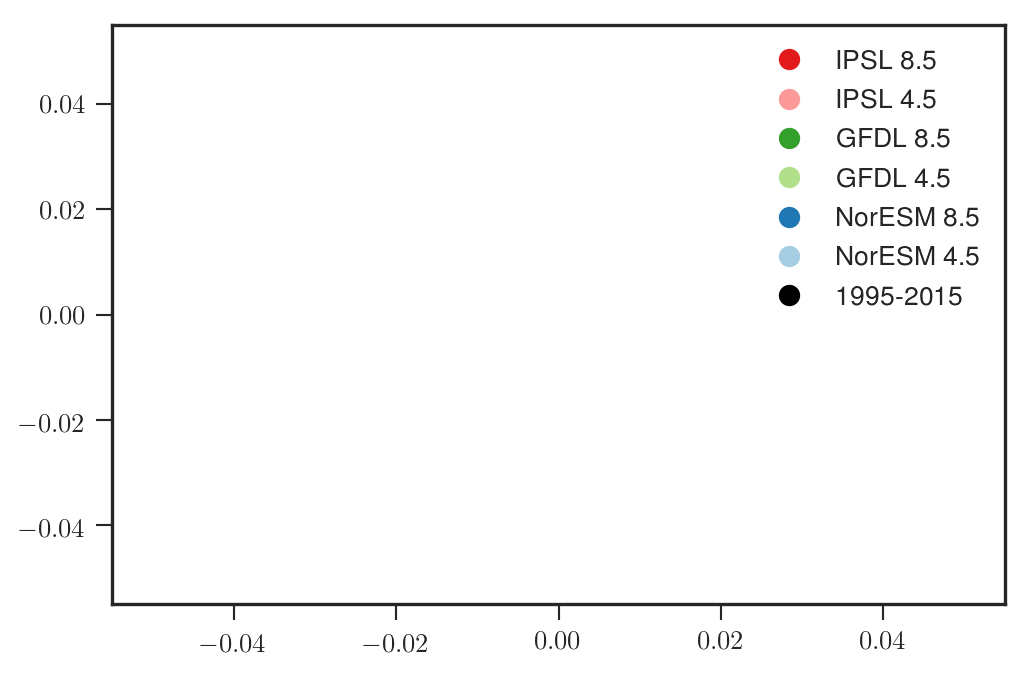

In [23]:
lp = lambda i: plt.plot([],color=clr_pltt[i], ms=np.sqrt(64), mec="none",
                        label=names_scen[i], ls="", marker="o")[0]
handles = [lp(i) for i in range(7)]
plt.legend(handles=handles)

In [24]:
max_ice_h = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY = Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmin().values

In [25]:
phy_may_sept_mean = Phy[-365*last_years:][(Phy.DOY>120) & (Phy.DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

In [26]:
phy_mass = 1
days_of_bloom_1mg = ((Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values

In [27]:
p_int_yearly_last_20y = []
pui_int_yearly_last_20y = [] #under ice cover
pni_int_yearly_last_20y = [] #under ice cover
fe_fx_ui_int_yearly_last_20y = [] #under ice cover
fe_fx_ni_int_yearly_last_20y = [] #no ice cover
o_int_yearly_last_20y = []
o_ui_int_yearly_last_20y = []
o_ni_int_yearly_last_20y = []
oxy_int_yearly_last_20y = []
oxy_ui_int_yearly_last_20y = []
oxy_ni_int_yearly_last_20y = []
ice_int_yearly_last_20y = []
ice_bool_int_yearly_last_20y = []
phy_int_yearly_last_20y = []
av_T_last_20y = []
fe_int_yearly_last_20y = []
Kz_av_last_20y = []

for scen in names_scen:
    ice_days_last_20y = Ice_bool[Ice_bool.Year>2049][scen].mean() * 365
    ice_bool_int_yearly_last_20y.append(ice_days_last_20y)
    p_int_yearly_last_20y.append(P_fx[P_fx.Year>2049][scen].mean())
    pui_int_yearly_last_20y.append(P_fx[P_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]>0][scen].mean())
    pni_int_yearly_last_20y.append(P_fx[P_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]==0][scen].mean())
    fe_fx_ui_int_yearly_last_20y.append(Fe2_fx[Fe2_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]>0][scen].mean())
    fe_fx_ni_int_yearly_last_20y.append(Fe2_fx[Fe2_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]==0][scen].mean())
    fe_int_yearly_last_20y.append(Fe2_fx[Fe2_fx.Year>2049][scen].mean())
    o_int_yearly_last_20y.append(O2_fx[O2_fx.Year>2049][scen].mean())
    o_ui_int_yearly_last_20y.append(O2_fx[O2_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]==0][scen].mean())
    o_ni_int_yearly_last_20y.append(O2_fx[O2_fx.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]>0][scen].mean())
    oxy_int_yearly_last_20y.append(Oxy[Oxy.Year>2049][scen].mean())
    oxy_ui_int_yearly_last_20y.append(Oxy[Oxy.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]==0][scen].mean())
    oxy_ni_int_yearly_last_20y.append(Oxy[Oxy.Year>2049][Ice_bool[Ice_bool.Year>2049][scen]>0][scen].mean())
    ice_int_yearly_last_20y.append(Ice[Ice.Year>2049][scen].mean())
    av_T_last_20y.append(Tair[Tair.Year>2049][scen].mean())
    phy_int_yearly_last_20y.append(Phy[Phy.Year>2049][scen].mean())
    Kz_av_last_20y.append(Kz_mean[Kz_mean.Year>2049][scen].mean())

In [28]:
p_int_yearly_IceOFF_last_20y = []
pui_int_yearly_IceOFF_last_20y = [] #under ice cover
pni_int_yearly_IceOFF_last_20y = [] #under ice cover
fe_fx_ui_int_yearly_IceOFF_last_20y = [] #under ice cover
fe_fx_ni_int_yearly_IceOFF_last_20y = [] #no ice cover
o_int_yearly_IceOFF_last_20y = []
o_ui_int_yearly_IceOFF_last_20y = []
o_ni_int_yearly_IceOFF_last_20y = []
oxy_int_yearly_IceOFF_last_20y = []
oxy_ui_int_yearly_IceOFF_last_20y = []
oxy_ni_int_yearly_IceOFF_last_20y = []
ice_int_yearly_IceOFF_last_20y = []
ice_bool_int_yearly_IceOFF_last_20y = []
phy_int_yearly_IceOFF_last_20y = []
av_T_IceOFF_last_20y = []
fe_int_yearly_IceOFF_last_20y = []
Kz_av_IceOFF_last_20y = []

for scen in names_scen:
    ice_days_IceOFF_last_20y = Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen].mean() * 365
    ice_bool_int_yearly_IceOFF_last_20y.append(ice_days)
    p_int_yearly_IceOFF_last_20y.append(P_fx_IceOFF[P_fx_IceOFF.Year>2049][scen].mean())
    pui_int_yearly_IceOFF_last_20y.append(P_fx_IceOFF[P_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]>0][scen].mean())
    pni_int_yearly_IceOFF_last_20y.append(P_fx_IceOFF[P_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]==0][scen].mean())
    fe_fx_ui_int_yearly_IceOFF_last_20y.append(Fe2_fx_IceOFF[Fe2_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]>0][scen].mean())
    fe_fx_ni_int_yearly_IceOFF_last_20y.append(Fe2_fx_IceOFF[Fe2_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]==0][scen].mean())
    fe_int_yearly_IceOFF_last_20y.append(Fe2_fx_IceOFF[Fe2_fx_IceOFF.Year>2049][scen].mean())
    o_int_yearly_IceOFF_last_20y.append(O2_fx_IceOFF[O2_fx_IceOFF.Year>2049][scen].mean())
    o_ui_int_yearly_IceOFF_last_20y.append(O2_fx_IceOFF[O2_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]==0][scen].mean())
    o_ni_int_yearly_IceOFF_last_20y.append(O2_fx_IceOFF[O2_fx_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]>0][scen].mean())
    oxy_int_yearly_IceOFF_last_20y.append(Oxy_IceOFF[Oxy_IceOFF.Year>2049][scen].mean())
    oxy_ui_int_yearly_IceOFF_last_20y.append(Oxy_IceOFF[Oxy_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]==0][scen].mean())
    oxy_ni_int_yearly_IceOFF_last_20y.append(Oxy_IceOFF[Oxy_IceOFF.Year>2049][Ice_bool_IceOFF[Ice_bool_IceOFF.Year>2049][scen]>0][scen].mean())
    ice_int_yearly_IceOFF_last_20y.append(Ice_IceOFF[Ice_IceOFF.Year>2049][scen].mean())
    av_T_IceOFF_last_20y.append(Tair_IceOFF[Tair_IceOFF.Year>2049][scen].mean())
    phy_int_yearly_IceOFF_last_20y.append(Phy_IceOFF[Phy_IceOFF.Year>2049][scen].mean())
    Kz_av_IceOFF_last_20y.append(Kz_mean_IceOFF[Kz_mean_IceOFF.Year>2049][scen].mean())

In [29]:
max_ice_h_last_20y = Ice[Ice.Year>2049].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY_last_20y = Phy[Phy.Year>2049].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up_last_20y = Ice[Ice.Year>2049].groupby(['DOY']).mean()[names_scen].idxmin().values
phy_mass = 1
days_of_bloom_1mg_last_20y = ((Phy[Phy.Year>2049].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy[Phy.Year>2049].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
phy_may_sept_mean_last_20y = Phy[Phy.Year>2049][(Phy[Phy.Year>2049].DOY>120) & (Phy[Phy.Year>2049].DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

In [30]:
max_ice_h_IceOFF_last_20y = Ice_IceOFF[Ice_IceOFF.Year>2049].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY_IceOFF_last_20y = Phy_IceOFF[Phy_IceOFF.Year>2049].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up_IceOFF_last_20y = Ice_IceOFF[Ice_IceOFF.Year>2049].groupby(['DOY']).mean()[names_scen].idxmin().values
phy_mass = 1
days_of_bloom_1mg_IceOFF_last_20y = ((Phy_IceOFF[Phy_IceOFF.Year>2049].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy_IceOFF[Phy_IceOFF.Year>2049].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
phy_may_sept_mean_IceOFF_last_20y = Phy_IceOFF[Phy_IceOFF.Year>2049][(Phy_IceOFF[Phy_IceOFF.Year>2049].DOY>120) & (Phy_IceOFF[Phy_IceOFF.Year>2049].DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

In [31]:
z_lake = np.array(hist_20y_plotter['MyLake_results']['basin1']['z'][0])

In [32]:
z  = np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['z'])
z_wc  = 100*np.array(hist_20y_plotter_IceOFF['MyLake_results']['basin1']['z'])

In [33]:
Fs = (1-0.92)

In [34]:
Fw = 0.92

In [35]:
F = (1-0.92)/0.92

In [36]:
# start=5448 + 182
# end=5448+90 + 182
start=-365*20
end=-1

# start=1
# end=365*20



In [37]:
def rates(results):
    return [-F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R31a'][start:end,:]),axis=0), z[0]), \
    -F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R32a'][start:end,:]),axis=0), z[0]), \
    -2*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R33a'][start:end,:]),axis=0), z[0]), \
    +2*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R33b'][start:end,:]),axis=0), z[0]), \
    -2*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R34a'][start:end,:]),axis=0), z[0]), \
    +2*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R34b'][start:end,:]),axis=0), z[0]), \
    -F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R35a'][start:end,:]),axis=0), z[0]), \
    +F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['Ra'][start:end,:]),axis=0), z[0]), \
    +F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['Rf'][start:end,:]),axis=0), z[0]), \
    +np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['Rc'][start:end,:]),axis=0), z[0]), \
    +200*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3a_P'][start:end,:]),axis=0), z[0]), \
    +1*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3b_P'][start:end,:]),axis=0), z[0]), \
    +116*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3f_P'][start:end,:]),axis=0), z[0]), \
    +200*4*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3c_P'][start:end,:]),axis=0), z[0]), \
    +200*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R4a_P'][start:end,:]),axis=0), z[0]), \
    +1*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R4b_P'][start:end,:]),axis=0), z[0]), \
    +116*4*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R4f_P'][start:end,:]),axis=0), z[0]), \
    +200*4*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R4c_P'][start:end,:]),axis=0), z[0])]


rate_names = [
    'R31a', 'R32a', 'R33a', 'R33b', 'R34a', 'R34b', 'R35a', 'Ra', 'Rf', 'Rc',
    'R3a_P', 'R3b_P', 'R3f_P', 'R3c_P', 'R4a_P', 'R4b_P', 'R4f_P', 'R4c_P'
]


In [38]:
Ice_rates = rates(hist_20y_plotter_IceOFF)
Reg_rates = rates(hist_20y_plotter)


In [39]:
for i,name in enumerate(rate_names):
    print('{}: {:.3f}, {:.3f}'.format(name, Reg_rates[i], Ice_rates[i]))

R31a: -30.743, -28.675
R32a: -0.000, -0.000
R33a: -0.045, -0.024
R33b: 2.531, 2.711
R34a: -5.931, -5.416
R34b: 0.199, 0.216
R35a: -0.003, -0.002
Ra: 2.082, 2.239
Rf: 0.047, 0.057
Rc: 0.000, 0.000
R3a_P: 11.071, 10.729
R3b_P: 22.579, 20.188
R3f_P: 0.127, 0.138
R3c_P: 0.000, 0.000
R4a_P: 0.000, 0.000
R4b_P: 0.000, 0.000
R4f_P: 0.000, 0.000
R4c_P: 0.000, 0.000


In [40]:
sum(Ice_rates)

2.161520329244717

In [41]:
sum(Reg_rates)

1.9155272424166148

In [42]:
def P_wc_rates(results):
    return [\
    np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['Re'][start:end,:]),axis=0), z_wc[0]), \
    np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['Rc'][start:end,:]),axis=0), z_wc[0]), \
    -np.trapz(np.mean(1/30973.762*np.multiply(np.array(results['MyLake_results']['basin1']['concentrations']['C'][start:end,:]), np.array(results['MyLake_results']['basin1']['rates']['Growth_bioz'][start:end,:])),axis=0), z_wc[0])+ \
    -np.trapz(np.mean(1/30973.762*np.multiply(np.array(results['MyLake_results']['basin1']['concentrations']['Chl'][start:end,:]), np.array(results['MyLake_results']['basin1']['rates']['Growth_bioz_2'][start:end,:])),axis=0), z_wc[0]), \
    np.trapz(np.mean(1/30973.762*np.multiply(np.array(results['MyLake_results']['basin1']['concentrations']['C'][start:end,:]), np.array(results['MyLake_results']['basin1']['rates']['Loss_bioz'][start:end,:])),axis=0), z_wc[0])+ \
    np.trapz(np.mean(1/30973.762*np.multiply(np.array(results['MyLake_results']['basin1']['concentrations']['Chl'][start:end,:]), np.array(results['MyLake_results']['basin1']['rates']['Loss_bioz_2'][start:end,:])),axis=0), z_wc[0]), \
    -np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['R31a'][start:end,:]),axis=0), z_wc[0]), \
    -np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['R32a'][start:end,:]),axis=0), z_wc[0]), \
    -2*np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['R33a'][start:end,:]),axis=0), z_wc[0]), \
    -2*np.trapz(np.mean(np.array(results['MyLake_results']['basin1']['rates']['R34a'][start:end,:]),axis=0), z_wc[0]), \
    ]


rate_names = ['Re', 'Rc', 'Growth_bioz', 'Loss_bioz', 'R31a', 'R32a', 'R33a', 'R34a']




In [43]:
np.array(hist_20y_plotter_IceOFF['MyLake_results']['basin1']['m_start'])

array([[2.015e+03],
       [1.000e+00],
       [1.000e+00]])

In [44]:
Ice_rates = P_wc_rates(hist_20y_plotter_IceOFF)
Reg_rates = P_wc_rates(hist_20y_plotter)

In [45]:
for i,name in enumerate(rate_names):
    print('{}: {:.3f}, {:.3f}'.format(name, Reg_rates[i], Ice_rates[i]))

Re: 0.559, 0.479
Rc: 0.457, 0.452
Growth_bioz: -2.810, -2.451
Loss_bioz: 6.634, 6.491
R31a: -0.343, -0.221
R32a: -0.000, -0.000
R33a: -0.000, -0.000
R34a: -0.000, -0.000


In [46]:
np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['sediment_transport_fluxes']['O2'][start:end,:]))

-579.6239241698675

In [47]:
np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['sediment_transport_fluxes']['POP'][start:end,:])) + np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'][start:end,:])) 

-1.268454378470378

In [48]:
np.mean(np.array(hist_20y_plotter['MyLake_results']['basin1']['concentrations']['P'][start:end,0]),axis=None)/30000



0.00032608155806895675

In [49]:
from extra_methods import *

In [50]:
integrated_over_depth_masses(hist_20y_plotter)

({'C': 0.036178798350249994,
  'Chl': 0.1031873157511242,
  'DOP': 1.2569589123160827,
  'P': 2.0296938769726913,
  'POP': 1.842362747423589,
  'PP': 0.056149941666235555},
 {'Ca3PO42': 313.0490910937126,
  'Fe3PO42': 613.7396489360045,
  'PO4': 0.4413075821144545,
  'PO4adsa': 168.4799167940629,
  'PO4adsb': 0.0018869535030721176,
  'PO4adsc': 1080.6115135660955,
  'POP': 885.2552164568017})

In [51]:
integrated_over_depth_masses(hist_20y_plotter_IceOFF)

({'C': 0.04292728518864689,
  'Chl': 0.1093769942679178,
  'DOP': 1.2848324100550796,
  'P': 1.8929398658684962,
  'POP': 1.6125809371853694,
  'PP': 0.038800485712665665},
 {'Ca3PO42': 309.7954268453056,
  'Fe3PO42': 612.7551024372999,
  'PO4': 0.6264067216806687,
  'PO4adsa': 165.9718511740879,
  'PO4adsb': 0.002631315784225871,
  'PO4adsc': 1080.5909710143292,
  'POP': 854.7046397073319})

In [52]:
integrated_over_depth_masses(hist_20y_plotter_IceOFF, start=365*12, end=365*13)

({'C': 0.04778341817583497,
  'Chl': 0.13783335386176454,
  'DOP': 1.3295058185582351,
  'P': 2.2470416756866682,
  'POP': 1.8018255645417773,
  'PP': 0.06079704585986884},
 {'Ca3PO42': 221.1497157102095,
  'Fe3PO42': 651.4438883392248,
  'PO4': 2.3105886440478955,
  'PO4adsa': 254.2892111603417,
  'PO4adsb': 0.005346175295647666,
  'PO4adsc': 1080.5282512840395,
  'POP': 885.3556369325628})

In [53]:
[key for key in hist_20y_plotter_IceOFF['Sediment_results'].keys()]

['basin1']

In [54]:
start

-7300

In [55]:
fx_convert

36500

In [56]:
fx_convert/31000*np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4adsa'][start:end,:]))

-0.05747992133014556

In [57]:
fx_convert/31000*np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4adsb'][start:end,:]))

0.0

In [58]:
def boundary_P_fluxes(results):
    inflow_q = np.array(results['MyLake_results']['basin1']['Inflw'][0, start:end])
    surf_P = np.array(results['MyLake_results']['basin1']['concentrations']['P'][start:end,0])
    surf_POP = np.array(results['MyLake_results']['basin1']['concentrations']['POP'][start:end,0])
    surf_DOP = np.array(results['MyLake_results']['basin1']['concentrations']['DOP'][start:end,0])
    surf_PP = np.array(results['MyLake_results']['basin1']['concentrations']['PP'][start:end,0])
    surf_Phy = np.array(results['MyLake_results']['basin1']['concentrations']['C'][start:end,0]) + np.array(results['MyLake_results']['basin1']['concentrations']['Chl'][start:end,0])
    inflow_POP = np.array(results['MyLake_results']['basin1']['Inflw'][22, start:end])
    inflow_TP = np.array(results['MyLake_results']['basin1']['Inflw'][4, start:end])
    inflow_DOP = np.array(results['MyLake_results']['basin1']['Inflw'][5, start:end])
    area=2.38e+7

    res = {}
    res['P_outflow'] = np.mean(inflow_q * surf_P) / 31 * 1000 / area * 365 / 1e4
    res['POP_outflow'] = np.mean(inflow_q*surf_POP)/31*1000/area*365/1e4
    res['PP_outflow'] = np.mean(inflow_q*surf_PP)/31*1000/area*365/1e4
    res['DOP_outflow'] = np.mean(inflow_q * surf_DOP) / 31 * 1000 / area * 365 / 1e4
    res['Phy_outflow'] = np.mean(inflow_q * surf_Phy) / 31 * 1000 / area * 365 / 1e4
    res['POP_inflow'] = np.mean(inflow_q * inflow_POP) / 31 * 1000 / area * 365 / 1e4
    res['DOP_inflow'] = np.mean(inflow_q * inflow_DOP) / 31 * 1000 / area * 365 / 1e4
    res['TP_inflow'] = np.mean(inflow_q * inflow_TP) / 31 * 1000 / area * 365 / 1e4

    return res


In [59]:
np.mean(np.array(hist_20y_plotter_IceOFF['MyLake_results']['basin1']['Inflw'][0, start:end]))*0.1/ 31 * 1000 / 2.38e+7 * 365 / 1e4

0.0023087389506191614

In [60]:
2.38e+7*10

238000000.0

In [61]:
0.4/F

4.600000000000002

In [62]:
boundary_P_fluxes(hist_20y_plotter_IceOFF)

{'DOP_inflow': 0.33042106364809465,
 'DOP_outflow': 0.22653022323493816,
 'POP_inflow': 1.3997221204709809,
 'POP_outflow': 0.24299564574638197,
 'PP_outflow': 0.005654181351414987,
 'P_outflow': 0.27153965559981763,
 'Phy_outflow': 0.047190456649340067,
 'TP_inflow': 1.730143184119075}

In [63]:
boundary_P_fluxes(hist_20y_plotter)

{'DOP_inflow': 0.33042106364809465,
 'DOP_outflow': 0.22503413421849114,
 'POP_inflow': 1.3997221204709809,
 'POP_outflow': 0.20733919242575252,
 'PP_outflow': 0.00377136175810967,
 'P_outflow': 0.24170237985670578,
 'Phy_outflow': 0.04927196762817321,
 'TP_inflow': 1.730143184119075}

In [64]:
sum(Reg_rates)

4.497134765995871

In [65]:
sum(Ice_rates)

4.749070412863422

In [66]:
Reg_rates

[0.5590128986181306,
 0.45720877338833144,
 -2.810045481585268,
 6.634129484843916,
 -0.3431709092692391,
 -0.0,
 -0.0,
 -0.0]

In [67]:
Ice_rates

[0.47921941477577157,
 0.45183701444022956,
 -2.4513370631504494,
 6.490612123576161,
 -0.2212610767782903,
 -0.0,
 -0.0,
 -0.0]

In [68]:
def iron_rates(results):
    return [\
    -4*200*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3a'][-365*20:,:]),axis=0), z[0]), \
    -4*1*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3b'][-365*20:,:]),axis=0), z[0]), \
    -4*116*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3f'][-365*20:,:]),axis=0), z[0]), \
    -4*200/F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3c'][-365*20:,:]),axis=0), z[0]), \
    -4*1/F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3d'][-365*20:,:]),axis=0), z[0]), \
    -2*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R12'][-365*20:,:]),axis=0), z[0]), \
    1/F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R13'][-365*20:,:]),axis=0), z[0]), \
    -np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R31a'][-365*20:,:]),axis=0), z[0]), \
    - 0.1*np.mean(np.array(results['Sediment_results']['basin1']['concentrations']['FeOH3'][-365*20:,-1:])), \
    -0.92/(1-0.92)*np.mean(np.array(results['Sediment_results']['basin1']['sediment_transport_fluxes']['FeOH3'][-365*20:]))\
    ]

In [69]:
names_iron = ['R3a', 'R3b', 'R3f', 'R3c', 'R3d', 'R12', 'R13', 'R31a','Burial','Deposit']

In [70]:
Ice_rates = iron_rates(hist_20y_plotter_IceOFF)
Reg_rates = iron_rates(hist_20y_plotter)

In [71]:
sum(Ice_rates)

1811.9994872408386

In [72]:
sum(Reg_rates)

2519.542061314179

In [73]:
for i,name in enumerate(names_iron):
    print('{}: {:.3f}, {:.3f}'.format(name, Reg_rates[i]*(1-0.92), Ice_rates[i]*(1-0.92)))

R3a: -53.037, -41.368
R3b: -108.088, -76.643
R3f: -0.633, -0.559
R3c: -0.001, -0.000
R3d: -0.000, -0.000
R12: -0.012, -0.011
R13: 4.167, 5.215
R31a: -28.283, -26.381
Burial: -0.025, -0.014
Deposit: 387.476, 284.720


In [74]:
def iron_2_rates(results):
    return [\
    4*200*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3a'][-365*20:,:]),axis=0), z[0]), \
    4*1*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3b'][-365*20:,:]),axis=0), z[0]), \
    4*116*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3f'][-365*20:,:]),axis=0), z[0]), \
    4*200*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3c'][-365*20:,:]),axis=0), z[0]), \
    4*1*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R3d'][-365*20:,:]),axis=0), z[0]), \
    2*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R12'][-365*20:,:]),axis=0), z[0]), \
    -np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R13'][-365*20:,:]),axis=0), z[0]), \
    +F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R27b'][-365*20:,:]),axis=0), z[0]), \
    +F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R29b'][-365*20:,:]),axis=0), z[0]), \
    -F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R27a'][-365*20:,:]),axis=0), z[0]), \
    -3*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R33a'][-365*20:,:]),axis=0), z[0]), \
    +3*F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R33b'][-365*20:,:]),axis=0), z[0]), \
    -F*np.trapz(np.mean(np.array(results['Sediment_results']['basin1']['rates']['R29a'][-365*20:,:]),axis=0), z[0]), \
    ]

In [75]:
names_iron_2 = ['R3a', 'R3b', 'R3f', 'R3c', 'R3d', 'R12', 'R13', 'R27b', 'R2bb', 'R27a', 'R33a', 'R33b', 'R29a']

In [76]:
Ice_rates = iron_2_rates(hist_20y_plotter_IceOFF)
Reg_rates = iron_2_rates(hist_20y_plotter)

In [77]:
sum(Ice_rates)

127.25380587882805

In [78]:
sum(Reg_rates)

175.03796781446746

In [79]:
for i,name in enumerate(names_iron_2):
    print('{}: {:.3f}, {:.3f}'.format(name, Reg_rates[i]*0.92, Ice_rates[i]*0.92))

R3a: 53.037, 41.368
R3b: 108.088, 76.643
R3f: 0.633, 0.559
R3c: 0.001, 0.000
R3d: 0.000, 0.000
R12: 0.012, 0.011
R13: -4.167, -5.215
R27b: 0.000, 0.000
R2bb: 0.000, 0.000
R27a: -0.000, -0.000
R33a: -0.062, -0.033
R33b: 3.493, 3.741
R29a: -0.000, -0.000


In [80]:
sum(Ice_rates)

127.25380587882805

In [81]:
sum(Reg_rates)

175.03796781446746

In [82]:
0.1*np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['concentrations']['FeOH3'][-365*20:,-1:]))

0.17008577242298029

In [83]:
0.1*np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['concentrations']['FeOH3'][-365*20:,-1:]))

0.3163043143364639

In [84]:
-np.mean(np.array(hist_20y_plotter['Sediment_results']['basin1']['sediment_transport_fluxes']['FeOH3'][-365*20:]))

421.169353876268

In [85]:
-np.mean(np.array(hist_20y_plotter_IceOFF['Sediment_results']['basin1']['sediment_transport_fluxes']['FeOH3'][-365*20:]))

309.47848168419574

### Ice break-ups

(755686.0, 756052.0)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


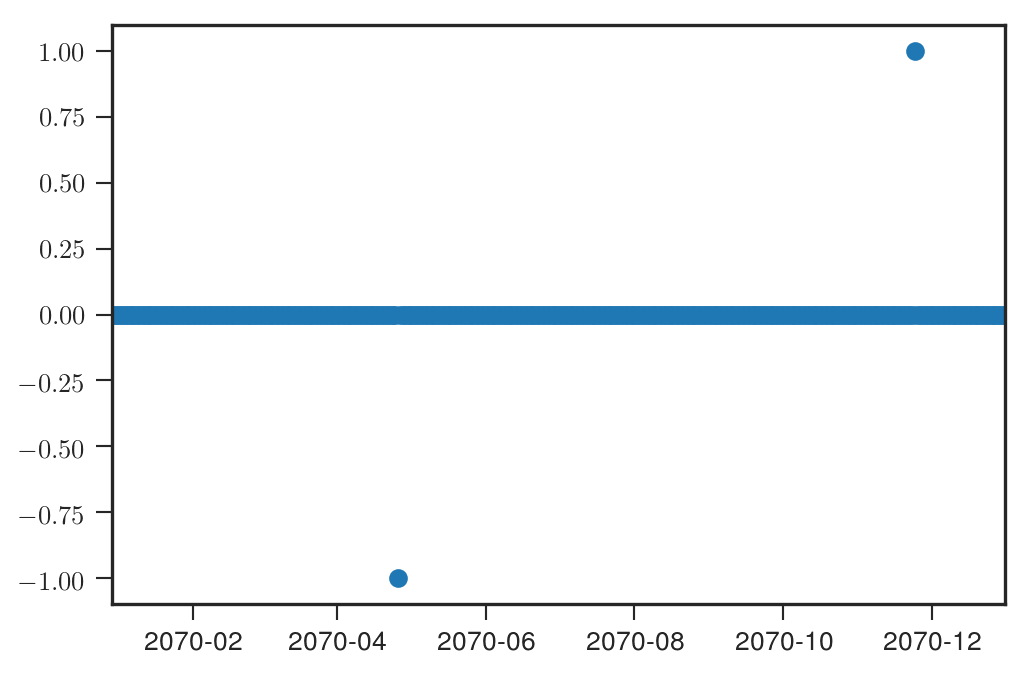

In [86]:
plt.plot_date(-366+np.array(hist_20y_plotter['MyLake_results']['basin1']['days']).flatten()[1:], np.diff(np.array(hist_20y_plotter['MyLake_results']['basin1']['His'][:,6])))
plt.xlim(-366+np.array(hist_20y_plotter['MyLake_results']['basin1']['days']).flatten()[-1]-366, -366+np.array(hist_20y_plotter['MyLake_results']['basin1']['days']).flatten()[-1])

In [87]:
np.array(hist_20y_plotter['MyLake_results']['basin1']['days']).flatten()

array([735965., 735966., 735967., ..., 756416., 756417., 756418.])

In [88]:
ice_break_up_days = np.array(hist_20y_plotter['MyLake_results']['basin1']['days']).flatten()[np.where(np.diff(np.array(hist_20y_plotter['MyLake_results']['basin1']['His'][:,6]))<0)]-366

In [89]:
from datetime import datetime
for d in ice_break_up_days:
    print(datetime.fromordinal(int(d)))

2015-04-07 00:00:00
2016-05-05 00:00:00
2017-04-02 00:00:00
2018-04-02 00:00:00
2019-04-10 00:00:00
2020-02-11 00:00:00
2021-04-26 00:00:00
2022-03-30 00:00:00
2023-04-23 00:00:00
2023-12-26 00:00:00
2024-04-13 00:00:00
2025-04-16 00:00:00
2026-04-30 00:00:00
2027-04-04 00:00:00
2028-01-15 00:00:00
2029-04-17 00:00:00
2030-04-27 00:00:00
2031-04-24 00:00:00
2032-03-29 00:00:00
2033-05-02 00:00:00
2034-04-21 00:00:00
2035-04-05 00:00:00
2036-05-04 00:00:00
2037-04-05 00:00:00
2038-04-02 00:00:00
2039-04-11 00:00:00
2040-02-11 00:00:00
2041-04-25 00:00:00
2042-03-29 00:00:00
2043-04-23 00:00:00
2043-12-26 00:00:00
2044-04-13 00:00:00
2045-04-15 00:00:00
2046-05-01 00:00:00
2047-04-06 00:00:00
2048-01-14 00:00:00
2049-04-16 00:00:00
2050-04-27 00:00:00
2051-04-25 00:00:00
2052-03-30 00:00:00
2053-04-30 00:00:00
2054-04-21 00:00:00
2055-04-07 00:00:00
2056-05-03 00:00:00
2057-04-01 00:00:00
2058-04-07 00:00:00
2059-04-11 00:00:00
2060-02-11 00:00:00
2061-04-25 00:00:00
2062-03-29 00:00:00


In [132]:
RCP8_IPSL_plotter.close()
RCP4_IPSL_plotter.close()
RCP8_GFDL_plotter.close()
RCP4_GFDL_plotter.close()
RCP8_NorESM_plotter.close()
RCP4_NorESM_plotter.close()
hist_20y_plotter.close()
str(datetime.now())

'2018-06-08 01:04:17.385743'

In [133]:
RCP8_IPSL_plotter_IceOFF.close()
RCP4_IPSL_plotter_IceOFF.close()
RCP8_GFDL_plotter_IceOFF.close()
RCP4_GFDL_plotter_IceOFF.close()
RCP8_NorESM_plotter_IceOFF.close()
RCP4_NorESM_plotter_IceOFF.close()
hist_20y_plotter_IceOFF.close()
str(datetime.now())

'2018-06-08 01:04:18.009724'

In [92]:
# RCP8_IPSL_plotter_Q10OFF.close()
# RCP4_IPSL_plotter_Q10OFF.close()
# RCP8_GFDL_plotter_Q10OFF.close()
# RCP4_GFDL_plotter_Q10OFF.close()
# RCP8_NorESM_plotter_Q10OFF.close()
# RCP4_NorESM_plotter_Q10OFF.close()
# hist_20y_plotter_Q10OFF.close()
# str(datetime.now())

In [93]:
0.78*(1-0.92)

0.06239999999999997

### periods of hypoxia <3ml/L

In [94]:
(Oxy[start:end].groupby(['DOY']).mean()['1995-2015']<3000).values.sum()

199

In [96]:
(Oxy[start:end].groupby(['DOY']).mean()[names_scen]<3000).sum()

IPSL 8.5      155
IPSL 4.5      143
GFDL 8.5      169
GFDL 4.5      185
NorESM 8.5    201
NorESM 4.5    186
1995-2015     199
dtype: int64

In [97]:
(Oxy_IceOFF[start:end].groupby(['DOY']).mean()[names_scen]<3000).sum().values

array([116, 113,  86,  82,  77,  71,  67])

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


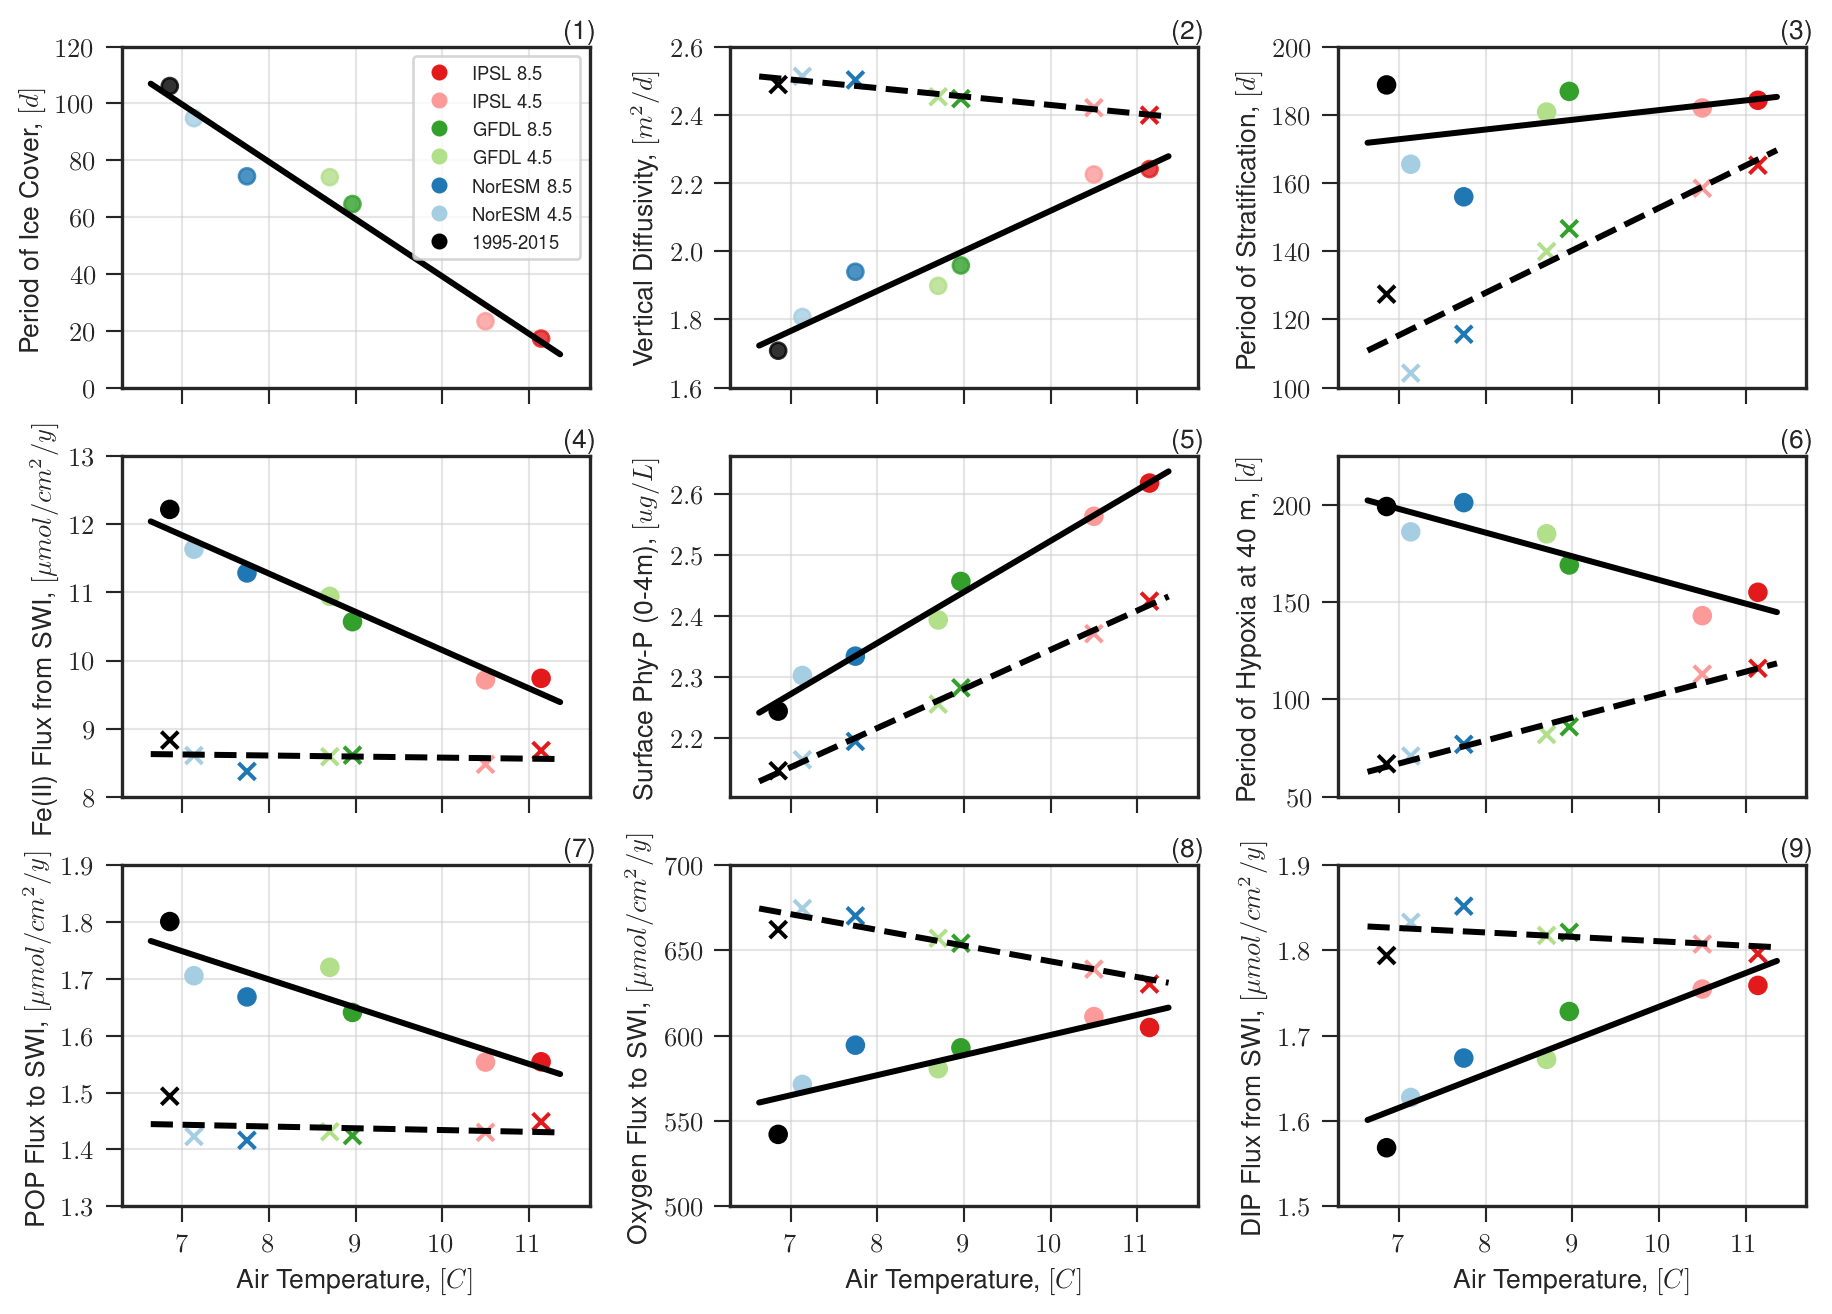

In [98]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(13,8), sharex=True, sharey=False)


x, y=np.array(av_T), np.array(ice_bool_int_yearly)
ax1=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt, }, line_kws={'color':'k', 'linestyle':'-'}, ax=ax1)
ax1.set_ylabel('Period of Ice Cover, $[d]$')


x, y=np.array(av_T), np.array(Kz_av)
ax2=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax2)

y, x = np.array(Kz_av_IceOFF), np.array(av_T_IceOFF)
ax2 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax2)
ax2.scatter(x,y, c=clr_pltt, s=40, marker='x')
ax2.set_ylabel('Vertical Diffusivity, $[m^2/d]$')



y, x=np.array(pycno_depth[names_scen].count()/(2070-2050)), np.array(av_T)
ax3=sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax3)
ax3.scatter(x,y, c=clr_pltt, s=40, marker='o')

y, x = np.array(pycno_depth_IceOFF[names_scen].count()/(2070-2050)), np.array(av_T_IceOFF)
ax3 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax3)
ax3.scatter(x,y, c=clr_pltt, s=40, marker='x')

ax3.set_ylabel('Period of Stratification, $[d]$')



y, x = fx_convert/56000*np.array(fe_int_yearly), np.array(av_T)
s1 =sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax4)
ax4.scatter(x,y, c=clr_pltt, s=40, marker='o')

# # y, x = np.array(days_of_bloom_1mg_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax4)
# ax4.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = fx_convert/56000*np.array(fe_int_yearly_IceOFF), np.array(av_T_IceOFF)
s2 = sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax4)
ax4.scatter(x,y, c=clr_pltt, s=40, marker='x')

# # y, x = np.array(fe_int_yearly_1mg_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax2)
# ax2.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax4.set_ylabel(r'Fe(II) Flux from SWI, $[\mu mol/cm^2/y]$')
# ax4.set_xlabel('Air Temperature, C')



y, x = np.array(phy_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax5)
ax5.scatter(x,y, c=clr_pltt, s=40, marker='o')

# # y, x = np.array(phy_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax5)
# ax5.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array(phy_int_yearly_IceOFF), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax5)
ax5.scatter(x,y, c=clr_pltt, s=40, marker='x')

# # y, x = np.array(phy_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax3)
# ax3.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax5.set_ylabel('Surface Phy-P (0-4m), $[ug/L]$')
# ax5.set_xlabel('Air Temperature, C')



y, x = np.array((Oxy[start:end].groupby(['DOY']).mean()[names_scen]<3000).sum().values), np.array(av_T)

sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax6)
ax6.scatter(x,y, c=clr_pltt, s=40, marker='o')

# # y, x = np.array(pycno_depth_Q10OFF.mean()[names_scen]), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax6)
# ax6.scatter(x,y, c=clr_pltt, s=40, marker='s')

y, x = np.array((Oxy_IceOFF[start:end].groupby(['DOY']).mean()[names_scen]<3000).sum().values), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax6)
ax6.scatter(x,y, c=clr_pltt, s=40, marker='x')

# # y, x = np.array(max_grow_DOY_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax4)
# ax4.scatter(x,y, c=clr_pltt, s=40, marker='^')

# ax4.set_xlabel('Air Temperature, C')
ax6.set_ylabel('Period of Hypoxia at 40 m, $[d]$')

x1, y1=np.array(av_T), -fx_convert/31000*np.array(POP_fx[names_scen].mean())
x2, y2 = np.array(av_T_IceOFF), -fx_convert/31000*np.array(POP_fx_IceOFF[names_scen].mean())
# # x3, y3 = np.array(av_T_Q10OFF), -fx_convert/31000*np.array(POP_fx_Q10OFF[names_scen].mean())
ax7.scatter(x1,y1, c=clr_pltt, s=40, marker='o')
ax7.scatter(x2,y2, c=clr_pltt, s=40, marker='x')
# ax7.scatter(x3,y3, c=clr_pltt, s=40, marker='s')
ax7 = sns.regplot(x1, y1, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax7)
ax7 = sns.regplot(x2, y2, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax7)
# ax7 = sns.regplot(x3, y3, ci=None, scatter_kws={'color':'white', 'alpha':0}, line_kws={'color':'k', 'linestyle':':'}, ax=ax7)

ax7.set_xlabel('Air Temperature, $[C]$')
ax7.set_ylabel('POP Flux to SWI, $[\mu mol/cm^2/y]$')



y, x = fx_convert/32000*np.array(o_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax8)
ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='o', label='Model')

# # y, x = fx_convert/32000*np.array(o_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax8)
# ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='s', label='Q10 off')

y, x = fx_convert/32000*np.array(o_int_yearly_IceOFF), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax8)
ax8.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='x', label='Ice off')

# # y, x = fx_convert/32000*np.array(o_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax5)
# ax5.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax8.set_ylabel('Oxygen Flux to SWI, $[\mu mol/cm^2/y]$')
ax8.set_xlabel('Air Temperature, $[C]$')



y, x = fx_convert/31000*np.array(p_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-'}, ax=ax9)
s1 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='o', label='Model')

# # y, x = fx_convert/31000*np.array(p_int_yearly_Q10OFF), np.array(av_T_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':':'}, ax=ax9)
# s2 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='s', label='Q10 off')

y, x = fx_convert/31000*np.array(p_int_yearly_IceOFF), np.array(av_T_IceOFF)
sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'--'}, ax=ax9)
s3 = ax9.scatter(x[::-1],y[::-1], c=clr_pltt[::-1], s=40, marker='x', label='Ice off')

# # # y, x = np.array(o_int_yearly_IceOFF_Q10OFF)/np.array(p_int_yearly_IceOFF_Q10OFF), np.array(av_T_IceOFF_Q10OFF)
# sns.regplot(x, y, ci=None, scatter_kws={'color':'white'}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax6)
# ax6.scatter(x,y, c=clr_pltt, s=40, marker='^')

ax9.set_ylabel('DIP Flux from SWI, $[\mu mol/cm^2/y]$')
ax9.set_xlabel('Air Temperature, $[C]$')


# l1 = ax1.legend(handles=handles, loc=1, fontsize='x-small', frameon=0)

# l1 = plt.legend(ax4.lines, ['Increasing $T_{air}$', 'Open water'],loc=(-2.57, 2.44), title='Scenarios', frameon=1, fontsize='x-small')
# plt.gca().add_artist(l1)
# ax9.legend()


# l2 = plt.legend(handles=handles, loc=(-2.05, 2.82), frameon=1, title='Climate models', fontsize='xx-small')
l2=ax1.legend(handles=handles, loc=1, frameon=1, fontsize='x-small')
# l2._legend_box.align = "right"
for i in [0,1,2,3,4,5,6]:
    l2.legendHandles[i]._legmarker.set_markersize(6)

# plt.gca().add_artist(l2)

# l3 = plt.legend([s1,s3,s2], ['$T_{air}$', 'Open water'],loc=(0.45, 0.35), title='Scenarios:', frameon=1)
# plt.gca().add_artist(l1)


# ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

for i, ax in enumerate([ax1, ax2,ax3, ax4,ax5, ax6, ax7,ax8, ax9]):
    ax.relim(visible_only=True)      # make sure all the data fits
    ax.autoscale()
    ax.text(0.98, 1.045, '('+str(i+1)+')', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.grid(alpha=0.5)
    ax.set_xlim(6.3,11.7)
    ax.set_xticks([7,8,9,10,11])


ax1.set_ylim(0, 120)
ax2.set_ylim(1.6, 2.6)
ax3.set_ylim(100, 200)
ax4.set_ylim(8, 13)
# ax5.set_ylim(2.3, 2.8)
ax6.set_ylim(50, 225)
ax7.set_ylim(1.3, 1.9)
ax8.set_ylim(500, 700)
ax9.set_ylim(1.5, 1.9)


plt.subplots_adjust(right=0.8, wspace=0.3, hspace=0.2)

# plt.tight_layout()

# savefig('cc/T/T_vs_Ice_vs_Q10_17m_sed_hypoxia_fig_final_3')

# ax9.set_ylim(0.85, 1.1)
# ax7.set_ylim(1.25, 1.7)

In [99]:
(np.array(Kz_av_IceOFF[:-1]) - np.array(Kz_av_IceOFF[-1])) /np.array(Kz_av_IceOFF[-1])

array([-0.03606336, -0.02720528, -0.01655384, -0.01433656,  0.00549682,
        0.00967689])

In [17]:
def relative_change(list_of_values, hist_value):
    return (np.array(list_of_values[:-1]) - np.array(hist_value)) /np.array(hist_value)*100

In [22]:
relative_change(Kz_av_IceOFF, Kz_av[-1])

array([40.422555  , 41.71296563, 43.26462685, 43.58763153, 46.47688093,
       47.08581749])

In [102]:
np.concatenate((relative_change(Kz_av_IceOFF, Kz_av[-1]), relative_change(Kz_av, Kz_av[-1])))

array([40.422555  , 41.71296563, 43.26462685, 43.58763153, 46.47688093,
       47.08581749, 31.17191566, 30.24564238, 14.63041109, 11.13478753,
       13.54744229,  5.79212538])

In [15]:
hue = ['2050-2070','2050-2070','2050-2070','2050-2070','2050-2070','2050-2070', 'No ice cover','No ice cover','No ice cover','No ice cover','No ice cover','No ice cover']

df = pd.DataFrame({'Scenario': hue,
                   'Change': np.concatenate((relative_change(Kz_av, Kz_av[-1]), relative_change(Kz_av_IceOFF, Kz_av[-1]))),
                    'Variable':'Vertical Mixing'})
df1 = pd.DataFrame({'Scenario': hue,
                   'Change': np.concatenate((relative_change(np.array(pycno_depth[names_scen].count()/(2070-2050)), np.array(pycno_depth[names_scen].count()/(2070-2050))[-1]), relative_change(np.array(pycno_depth_IceOFF[names_scen].count()/(2070-2050)), np.array(pycno_depth[names_scen].count()/(2070-2050))[-1]))),
                    'Variable':'Period of Stratification'})

df = df.append(df1)


name = 'Period of Hypoxia'
clim = np.array((Oxy[start:end].groupby(['DOY']).mean()[names_scen]<3000).sum().values)
no_ice = np.array((Oxy_IceOFF[start:end].groupby(['DOY']).mean()[names_scen]<3000).sum().values)
df1 = pd.DataFrame({'Scenario': hue,
                   'Change': np.concatenate((relative_change(clim, clim[-1]), relative_change(no_ice, clim[-1]))),
                    'Variable':name})
df = df.append(df1)



clim = np.array(phy_int_yearly)
no_ice = np.array(phy_int_yearly_IceOFF)
name = 'Surface Phytoplankton'
df1 = pd.DataFrame({'Scenario': hue,
                   'Change': np.concatenate((relative_change(clim, clim[-1]), relative_change(no_ice, clim[-1]))),
                    'Variable':name})
df = df.append(df1)





name = 'POP flux to SWI'
clim = -fx_convert/31000*np.array(POP_fx[names_scen].mean())
no_ice = -fx_convert/31000*np.array(POP_fx_IceOFF[names_scen].mean())
df1 = pd.DataFrame({'Scenario': hue,
                   'Change': np.concatenate((relative_change(clim, clim[-1]), relative_change(no_ice, clim[-1]))),
                    'Variable':name})
df = df.append(df1)


name = 'Oxygen Flux to SWI'
clim = fx_convert/32000*np.array(o_int_yearly)
no_ice = fx_convert/32000*np.array(o_int_yearly_IceOFF)
df1 = pd.DataFrame({'Scenario': hue,
                   'Change': np.concatenate((relative_change(clim, clim[-1]), relative_change(no_ice, clim[-1]))),
                    'Variable':name})
df = df.append(df1)



name = 'DIP Flux from SWI'
clim = fx_convert/31000*np.array(p_int_yearly)
no_ice = fx_convert/31000*np.array(p_int_yearly_IceOFF)
df1 = pd.DataFrame({'Scenario': hue,
                   'Change': np.concatenate((relative_change(clim, clim[-1]), relative_change(no_ice, clim[-1]))),
                    'Variable':name})
df = df.append(df1)

clim = fx_convert/56000*np.array(fe_int_yearly)
no_ice = fx_convert/56000*np.array(fe_int_yearly_IceOFF)
name = 'Iron Flux From SWI'

df1 = pd.DataFrame({'Scenario': hue,
                   'Change': np.concatenate((relative_change(clim, clim[-1]), relative_change(no_ice, clim[-1]))),
                    'Variable':name})
df = df.append(df1)


NameError: name 'relative_change' is not defined

In [16]:
f = plt.figure(figsize=(4,6))
sns.violinplot(y='Variable', x='Change', data=df, hue='Scenario', orient="h",split=1, inner=None)
plt.ylabel('')
plt.xlabel('Predicted Relative Change, $[\%]$')
plt.legend(frameon=1)

NameError: name 'df' is not defined

<Figure size 768x1152 with 0 Axes>

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


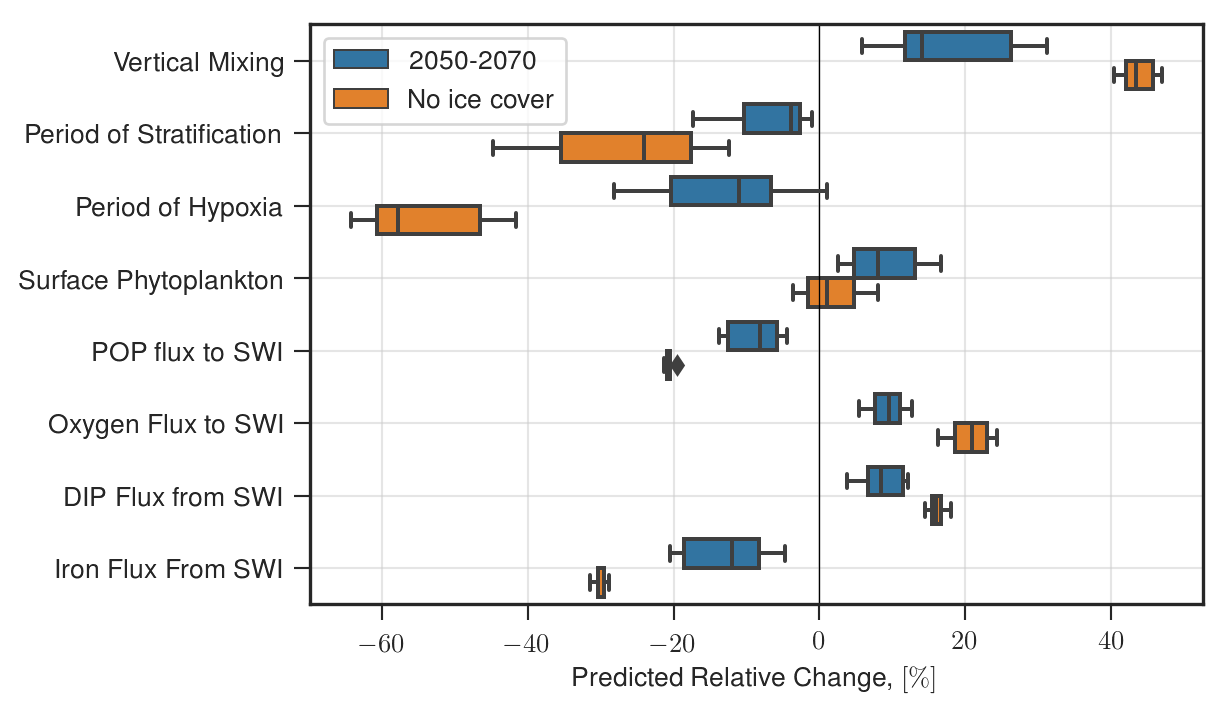

In [105]:
f = plt.figure(figsize=(6,4))
sns.boxplot(y='Variable', x='Change', data=df, hue='Scenario', orient="h")
plt.ylabel('')
plt.xlabel('Predicted Relative Change, $[\%]$')
plt.grid(alpha=0.5)
plt.vlines([0], ymin=-50, ymax=20, lw=0.5)
plt.legend(frameon=1)
# savefig('cc/T/relative_change')

No handles with labels found to put in legend.
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


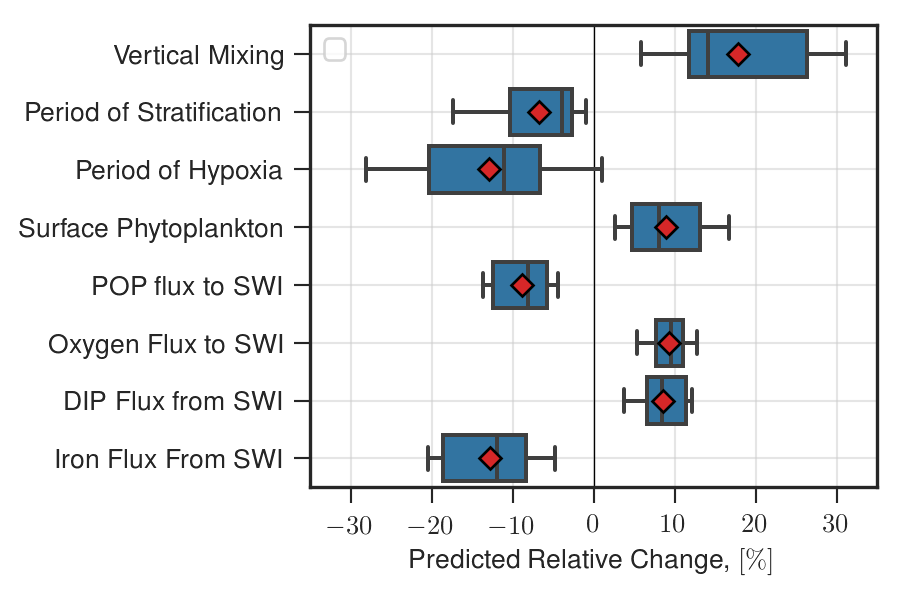

In [106]:
f = plt.figure(figsize=(6*0.8,4*0.8))
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor=sns.color_palette()[3])
sns.boxplot(meanprops=meanpointprops, y='Variable', x='Change', data=df[df['Scenario']=='2050-2070'], orient="h", color=sns.color_palette()[0], showmeans=True)
plt.ylabel('')
plt.xlabel('Predicted Relative Change, $[\%]$')
plt.grid(alpha=0.5)
plt.vlines([0], ymin=-50, ymax=20, lw=0.5)
plt.legend(frameon=1)
plt.xlim(-35,35)
plt.tight_layout()
# savefig('cc/T/relative_change')

In [62]:
Oxy_bool = Oxy
Oxy_bool[names_scen] = Oxy[names_scen] < 3000

In [85]:
dfs = [Kz_mean.groupby(['Year']).mean()[names_scen], pycno_depth.groupby(['Year']).count()[names_scen], Oxy_bool.groupby(['Year']).sum()[names_scen], Phy.groupby(['Year']).mean()[names_scen], POP_fx.groupby(['Year']).mean()[names_scen], O2_fx.groupby(['Year']).mean()[names_scen], P_fx.groupby(['Year']).mean()[names_scen], Fe2_fx.groupby(['Year']).mean()[names_scen]]
names=['Vertical mixing','Period of stratification','Period of hypoxia','Surface phytoplankton', 'POP flux to SWI', 'Oxygen flux to SWI', 'DIP flux from SWI', 'Fe flux from SWI']
new_dfs = []
for n,df in zip(names, dfs):
    for c in df.columns[:-1]:
        new_dfs.append(pd.DataFrame({'Value': 100*(df[c].values-df[df.columns[-1]].values)/df[df.columns[-1]].values, 'Year': df.index.values, 'Scenario':c, 'name':n}))
        
        
base_df = new_dfs[0]
for d in new_dfs[1:]:
    base_df = base_df.append(d, ignore_index=True)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


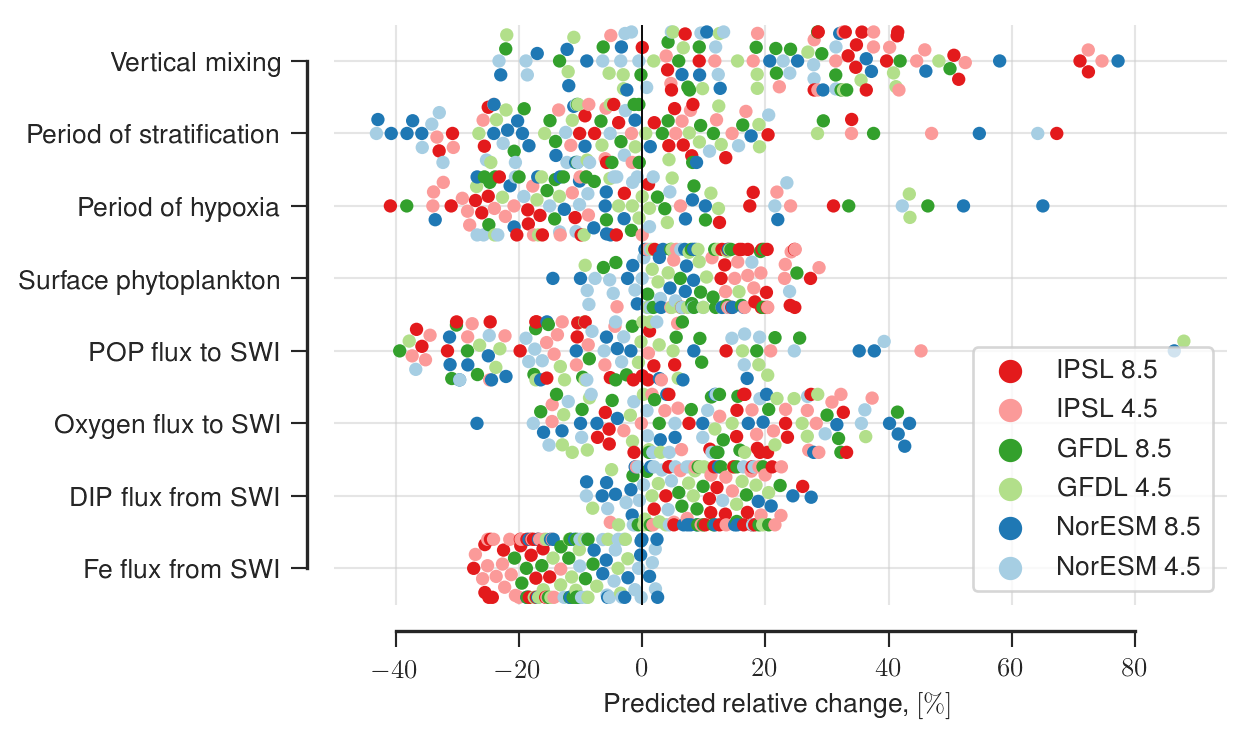

In [90]:

sns.swarmplot(data=base_df, y='name', x='Value', hue='Scenario', palette=clr_pltt, orient='h', )
plt.vlines([0], ymin=-50, ymax=20, lw=0.7,zorder=10)
plt.legend(frameon=1)
plt.grid(alpha=0.5)
plt.ylabel('')
plt.xlabel('Predicted relative change, $[\%]$')







sns.despine(offset=10, trim=True);

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


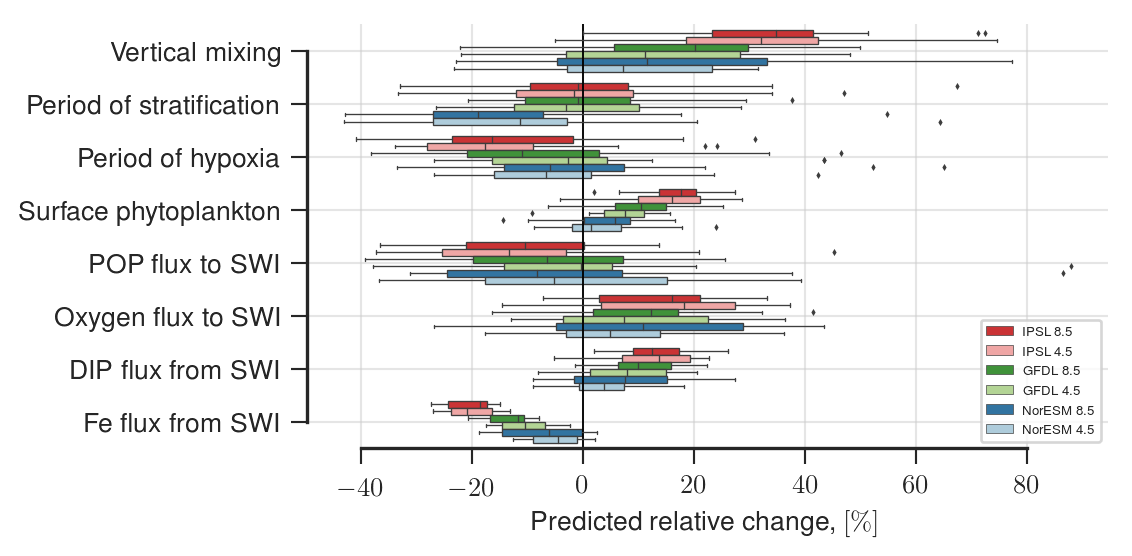

In [149]:
f= plt.figure(figsize=(6,3))
# ax=plt.subplot(111)
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
ax= sns.boxplot(linewidth=0.5, meanprops=meanpointprops,data=base_df, y='name', x='Value', hue='Scenario', palette=clr_pltt, orient='h', fliersize=0.5, showmeans=0)
plt.vlines([0], ymin=-50, ymax=20, lw=0.7)
plt.legend(frameon=1)
plt.grid(alpha=0.5)
plt.ylabel('')
plt.xlabel('Predicted relative change, $[\%]$')
# plt.xlabel('')


# ax.axis["left"].major_ticklabels.set_ha("left")

plt.legend(frameon=1, loc=4, prop={'size': 5})

# sns.despine(offset=10, trim=True);
sns.despine(offset=0, trim=True);
plt.tight_layout()
# savefig('cc/T/relative_change_2')